# <i><b>Trabajo Practico Numero 1º<b><i> 

#### <b><i>Integrantes:<i><b>
#### <b><i>-Agustin Galli.<i><b>
#### <b><i>-Ana Affranchino.<i><b>
#### <b><i>-Fernando Castro Saia.<i><b>
#### <b><i>-Martin Sciandro.<i><b>
#### <b><i>-Tobias Canavesi.<i><b>

<p style="color:#FF0000";> Seria buena una introducción a la notebook, comentando  el objetivo del desafio, la presentación del dataset y un índice

------------------------------------------------------------------------------------------------------

##### <i>Importacion de librerias y del DataFrame:<i>

In [1]:
#Importacion de librerias para Dataframes & Arrays:
import pandas as pd
import geopandas as gpd
import numpy as np
#Importacion de librerias de visualizacion:
import seaborn as sns
import contextily as cx
import matplotlib as mlp
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv("../properatti.csv", sep = ",", encoding = 'utf8')
data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


### <i> Limpieza de Datos: <i>

In [3]:
#Eliminacion columnas innecesarias:
data_1=data.drop(columns=['image_thumbnail','properati_url','lat-lon','Unnamed: 0','expenses','price_aprox_local_currency'])

In [4]:
#Cantidad de nulos:
(data_1.isnull().sum()/data_1.shape[0])*100

operation                   0.000000
property_type               0.000000
place_name                  0.018974
place_with_parent_names     0.000000
country_name                0.000000
state_name                  0.000000
geonames_id                15.440521
lat                        42.525986
lon                        42.525986
price                      16.837156
currency                   16.837981
price_aprox_usd            16.837156
surface_total_in_m2        32.443491
surface_covered_in_m2      16.422208
price_usd_per_m2           43.394654
price_per_m2               27.686850
floor                      93.483749
rooms                      60.905791
description                 0.001650
title                       0.000000
dtype: float64

In [5]:
data_1.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


<AxesSubplot:>

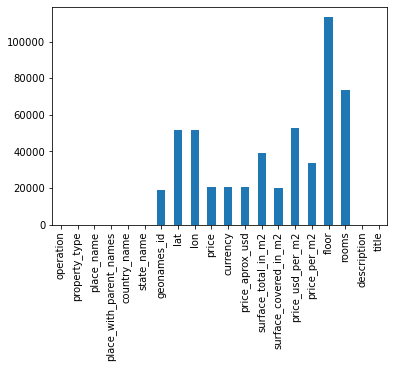

In [6]:
#Numero de nulos por columna:
vc_nulls = data_1.apply(lambda x: x.isnull().value_counts()).T[True]
vc_nulls.hist() 
vc_nulls.plot(kind = 'bar')

<p style="color:#FF0000";> Perfecto la idea de arrancar gráficando para  conocer el datasets. Es más rápido apoyatse en visualizaciones que en tablas

In [7]:
#Filtramos y limpiamos moneda dejando unicamente USD y ARS:
monedas=data_1['currency'].unique()
monedas

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [8]:
data_1['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [9]:
mask1=data['currency']=='UYU'
mask2=data['currency']=='PEN'

In [10]:
data_1[mask1 | mask2].index.values

array([ 50387,  50388, 107390], dtype=int64)

In [11]:
indices =  data_1[mask1 | mask2].index.values

In [12]:
data_2=data_1.drop(index= indices)
data_2['currency'].unique()

array(['USD', nan, 'ARS'], dtype=object)

In [13]:
data_2.head(2)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,40.0,1127.272727,1550.0,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...


In [14]:
maskarg=data_2['currency']=='ARS'
data_2[maskarg]['price_aprox_usd'].isnull().sum()

0

In [15]:
#Eliminacion de duplicados con igual latitud, longitud y descripcion:
data_2_nodup = data_2.drop_duplicates(subset = ['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat', 'lon', 'price',
       'currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms'], keep = "first").copy()
data_2_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108345 entries, 0 to 121219
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   operation                108345 non-null  object 
 1   property_type            108345 non-null  object 
 2   place_name               108322 non-null  object 
 3   place_with_parent_names  108345 non-null  object 
 4   country_name             108345 non-null  object 
 5   state_name               108345 non-null  object 
 6   geonames_id              91025 non-null   float64
 7   lat                      65535 non-null   float64
 8   lon                      65535 non-null   float64
 9   price                    93609 non-null   float64
 10  currency                 93608 non-null   object 
 11  price_aprox_usd          93609 non-null   float64
 12  surface_total_in_m2      73053 non-null   float64
 13  surface_covered_in_m2    91603 non-null   float64
 14  pric

In [16]:
data_2_nodup.shape

(108345, 20)

<p style="color:#FF0000";> No me queda claro la razón del subset que utilizan para eliminar duplicados. Usualmente esperariamos eliminar duplicados por todas las columnas, excluyendo la de texto libre (description y title), ya que es poco probable que una persona redacte 2 veces igual una publicación. Siguiendo su linea de trabajo, ¿por qué no considerar rooms al momento de eliminar duplicados? Si son la misma casa, deberian estar cargada cona la misma cantidad de habitaciones 

<p style="color:#FF0000";> Ojo, no digo que este mal. Solo me llama la atención. Si ustedes tienen buenos fundamentos para considerar únicamente este subset, me parece bien

In [17]:
data_2_nodup.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


In [18]:
def clean_outliers(columna):    
    q1 = columna.quantile(0.25)
    # print(q1)
    q2 = columna.quantile(0.5)
    # print(q2)
    q3 = columna.quantile(0.75)
    # print(q3)

    iqr = (q3 - q1) * 1.5
    up_threshold = q3 + iqr
    low_threshold = q1 - iqr
    # print(up_threshold)
    # print(low_threshold)
    outlier_mask_up = columna > up_threshold
    outlier_mask_down = columna < low_threshold
    outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
    not_outliers = np.logical_not(outlier_mask)
    outliers = columna[outlier_mask]
    return outliers


In [19]:
def cleanOutliers(column):
    ## Definimos los umbrales de comparación
    q3=column.quantile(0.75)
    q1=column.quantile(0.25)
    rango_intercuartil=q3-q1
    limite_superior= q3+rango_intercuartil*1.5
    limite_inferior = q1-rango_intercuartil*1.5
    
    ## Imputamos nulos en los valores outliers
    mask_outlier = (column<limite_inferior) | (column>limite_superior) 
    column[mask_outlier] = np.NaN

    return column
## Seteamos los valores de nuestra agrupación ("grupo") y nuestra columna a limiar ("valor") y probamos la función
# data.groupby('grupo')["valor"].transform(lambda column: cleanOutliers(column))

## También se puede utilizar sobre una columna sin agrupar
# cleanOutliers(data["valor"])

In [20]:
data_2_nodup.shape

(108345, 20)

Chequeamos que haya eliminado outliers

<p style="color:#FF0000";> Sería recomendable hacer una limpieza de outliers agrupando por tipo de propiedad y localidad

In [21]:
#Imputacion precio 'price_usd_per_m2':
data_2_nodup['precios_sin_outliers'] = data_2_nodup['price_usd_per_m2']
mask1 = data_2_nodup['precios_sin_outliers'].isnull()

(data_2_nodup.loc[mask1, 'precios_sin_outliers']).isnull().sum()
data_2_nodup.loc[mask1, 'precios_sin_outliers'] = (data_2_nodup.loc[mask1, 'price']/data_2_nodup.loc[mask1, 'surface_covered_in_m2'])
data_2_nodup.loc[:, 'precios_sin_outliers'].isnull().sum()/data_2_nodup.shape[0]

0.20008306797729475

### <i> Limpieza con REGEX: <i>

In [22]:
data_2_nodup['description'][1]

'Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

<p style="color:#FF0000";> Fijense que cargaron el dataset con el encoding incorrecto. Usaron 'latin-1' cuando el apropiado era 'utf8', así resolverían el problema que se les presenta con las letras con tilde. Prueben cómo queda cambiando esta opción al inicio de la notebook

In [23]:
#REGEX piletas:
pileta_pattern = "pileta|picina|pisina|piscina"
pileta_regex = re.compile(pileta_pattern, re.I)
pileta_matches = data_2_nodup['description'].apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
pileta_mask = pileta_matches.notnull()
pileta_description = pileta_matches.loc[pileta_mask]

In [24]:
pileta_description

7         <re.Match object; span=(101, 107), match='PILE...
8         <re.Match object; span=(101, 107), match='PILE...
13        <re.Match object; span=(100, 107), match='Pisc...
14        <re.Match object; span=(75, 82), match='Piscina'>
18        <re.Match object; span=(418, 425), match='Pisc...
                                ...                        
121211    <re.Match object; span=(451, 457), match='pile...
121212    <re.Match object; span=(594, 600), match='pile...
121213    <re.Match object; span=(264, 270), match='pile...
121215    <re.Match object; span=(287, 293), match='pile...
121216    <re.Match object; span=(883, 889), match='pile...
Name: description, Length: 29347, dtype: object

In [25]:
pileta_description.iloc[2].string

' Torre I Mondrian. 3 ambientes con terraza y dos baños al frente.Vitraux ofrece en el ultimo nivel, Piscina con Solarium, un espacio con Sala de Reunión para uso profesional, eventos o proyecciones con un amplio Foyer, Sauna, Gimnasio, un Salón de Usos Múltiples con cocina y una amplia expansión. Asimismo cuenta con un Hall en Doble altura y un amplio Estar que balconea al mismo en el primer piso.Así destaca la Excelente Relación de espacios de uso común sobre el metro propio, sobre todo en Studios que rondan los 30 metros propios y pueden gozar de todos los diferentes usos especiales.'

In [26]:
pileta_mask

0         False
1         False
2         False
3         False
4         False
          ...  
121214    False
121215     True
121216     True
121217    False
121219    False
Name: description, Length: 108345, dtype: bool

In [27]:
description_to_replace = [x.string for x in pileta_description]
print(len(description_to_replace))
description_to_replace_unique = list(set(description_to_replace))
print(len(description_to_replace_unique))

29347
26286


In [28]:
#Creacion de nuevas columnas:
data_2_nodup['pileta']=''
data_2_nodup['cochera']=''
data_2_nodup.loc[pileta_mask, 'pileta'] =1

In [29]:
data_2_nodup.head(1)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title,precios_sin_outliers,pileta,cochera
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,40.0,1127.272727,1550.0,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,


In [30]:
#REGEX cochera:
cochera_pattern = "cochera|garage"
cochera_regex = re.compile(cochera_pattern, re.I)
cochera_matches = data_2_nodup['description'].apply(lambda x: x if x is np.NaN else cochera_regex.search(x))
cochera_mask = cochera_matches.notnull()
cochera_description = cochera_matches.loc[cochera_mask]

In [31]:
cochera_description.iloc[0].string

'Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [32]:
description_to_replace_cochera= [x.string for x in cochera_description]
print(len(description_to_replace_cochera))
description_to_replace_unique_cochera = list(set(description_to_replace_cochera))
print(len(description_to_replace_unique_cochera))

45236
40803


In [33]:
data_2_nodup.loc[cochera_mask, 'cochera'] = 1

In [34]:
data_2_nodup.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title,precios_sin_outliers,pileta,cochera
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,...,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,,1
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,...,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909,,


In [35]:
#REGEX ambientes:
pattern_ambientes = "(?P<ambiente>\w+?\s(amb|AMB|Ambiente|ambiente|AMBIENTE|Ambientes|ambientes|AMBIENTES|MONOAMBIENTE)\s\d?)"
regex_ambientes = re.compile(pattern_ambientes)
description = data_2_nodup['description'].astype(str)
resultado_ambientes = description.apply(lambda x: regex_ambientes.search(x))
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group('ambiente'))
ambientes_match.value_counts

<bound method IndexOpsMixin.value_counts of 0                   2 AMBIENTES 
1                           None
2                  2 AMBIENTES 3
3                   3 ambientes 
4                           None
                   ...          
121214                      None
121215                      None
121216                      None
121217    DEPARTAMENTO AMBIENTE 
121219                      None
Name: description, Length: 108345, dtype: object>

<p style="color:#FF0000";> Para evitar tener que incluir variaciones con y sin mayusculas y con y sin tildes en las regex, lo mejor es pasar todo a minuscula (o mayúscula) y remover todos los caracteres especiales y luego aplicar las regex sobre esta columna corregida. A continuación un ejemplo de la formula que deberian aplicar para toda la serie:
    
    

<p style="color:#FF0000";>  ^

In [36]:
pattern_ambientes = "(?P<ambiente>\w+?\s(amb|AMB|Ambiente|ambiente|AMBIENTE|Ambientes|ambientes|AMBIENTES|MONOAMBIENTE)\s\d?)"
regex_ambientes = re.compile(pattern_ambientes)
title = data_2_nodup['title'].astype(str)
resultado_ambientes2 = title.apply(lambda x: regex_ambientes.search(x))
ambientes_match2 = resultado_ambientes2.apply(lambda x: x if x is None else x.group('ambiente'))
ambientes_match2.value_counts

<bound method IndexOpsMixin.value_counts of 0                         2 AMB 
1                           None
2                        2 AMB 3
3                           None
4                         2 AMB 
                   ...          
121214                      None
121215                      None
121216                      None
121217    DEPARTAMENTO AMBIENTE 
121219                      None
Name: title, Length: 108345, dtype: object>

In [37]:
ambientes_match.head(10)

0               2 AMBIENTES 
1                       None
2              2 AMBIENTES 3
3               3 ambientes 
4                       None
5                       None
6                       None
7    EXCELENTE MONOAMBIENTE 
8             DOS AMBIENTES 
9                       None
Name: description, dtype: object

In [38]:
data_2_nodup['ambientes'] = ambientes_match
data_2_nodup['ambientes2'] = ambientes_match2

In [39]:
data_ambientes = data_2_nodup.loc[:, 'ambientes': 'ambientes2'].astype(str)
data_ambientes

,ambientes,ambientes2
0,2 AMBIENTES,2 AMB
1,None,None
2,2 AMBIENTES 3,2 AMB 3
3,3 ambientes,None
4,None,2 AMB
...,...,...
121214,None,None
121215,None,None
121216,None,None
121217,DEPARTAMENTO AMBIENTE,DEPARTAMENTO AMBIENTE


In [40]:
pattern_nro_ambientes = "(?P<nro_ambientes>\d)"
regex_nro_ambientes = re.compile(pattern_nro_ambientes)

resultado_nro_amb = data_ambientes['ambientes'].apply(lambda x: regex_nro_ambientes.search(x))
# [('ambientes', 'ambientes2')]
nro_amb_match = resultado_nro_amb.apply(lambda x: x if x is None else x.group('nro_ambientes'))

In [41]:
pattern_nro_ambientes = "(?P<nro_ambientes>\d)"
regex_nro_ambientes = re.compile(pattern_nro_ambientes)

resultado_nro_amb2 = data_ambientes['ambientes2'].apply(lambda x: regex_nro_ambientes.search(x))

nro_amb_match2 = resultado_nro_amb2.apply(lambda x: x if x is None else x.group('nro_ambientes'))

nro_amb_match2

0            2
1         None
2            2
3         None
4            2
          ... 
121214    None
121215    None
121216    None
121217    None
121219    None
Name: ambientes2, Length: 108345, dtype: object

In [42]:
df_amb = pd.DataFrame([nro_amb_match, nro_amb_match2])
df_ambientes = df_amb.T
df_ambientes

,ambientes,ambientes2
0,2,2
1,None,None
2,2,2
3,3,None
4,None,2
...,...,...
121214,None,None
121215,None,None
121216,None,None
121217,None,None


In [43]:
ambientes=df_ambientes.apply(lambda x: x['ambientes'] if x['ambientes']!= None else x['ambientes2'],axis=1)

In [44]:
data_3_nodup = data_2_nodup.drop(['ambientes', 'ambientes2'], axis=1)
data_3_nodup['ambientes'] = ambientes
data_3_nodup.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,description,title,precios_sin_outliers,pileta,cochera,ambientes
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,,2
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,...,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,,1,None
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,...,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909,,,2
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,95000.0,...,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,NaN,,,3
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,64000.0,...,1828.571429,1828.571429,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,1828.571429,,,2


In [45]:
#REGEX barrio:
pattern_barrio = "(?P<barrio_cerrado>\w+?\s(barrio cerrado)\s\d?)"
regex_barrio = re.compile(pattern_barrio, flags=re.IGNORECASE)
description = data_3_nodup['description'].astype(str)
resultado_barrio = description.apply(lambda x: regex_barrio.search(x))
resultado_barrio.value_counts()

barrios_match = resultado_barrio.apply(lambda x: x if x is None else x.group('barrio_cerrado'))

barrios_match.value_counts()

data_3_nodup['barrio_cerrado']= barrios_match

In [46]:
operation_type = data_3_nodup.groupby('property_type', axis=0).count().iloc[:, 0]
operation_type

property_type
PH            5539
apartment    60769
house        38121
store         3916
Name: operation, dtype: int64

In [47]:
data_3_nodup.loc[data_3_nodup['place_name'].isnull(), 'place_name'] = 'Tigre'

In [48]:
data_3_nodup.groupby(['place_name', 'property_type'])['precios_sin_outliers'].mean().round(2)

place_name               property_type
 Country Maschwitz Club  house            1184.16
 los alamos              apartment        1600.00
9 de Abril               house              94.02
                         store             465.91
Abasto                   PH               1618.03
                                           ...   
Yerba Buena              store             694.02
Zelaya                   house             560.21
Zárate                   house            1888.97
coordenadas 34.255511    house            1943.46
Álvarez                  house                NaN
Name: precios_sin_outliers, Length: 2119, dtype: float64

In [49]:
mask_place1= data_3_nodup['place_name'].value_counts() ==1
mask_place1.value_counts()

mask1= data_3_nodup['place_name']  == ' Country Maschwitz Club'

data_3_nodup[mask1]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,price_per_m2,floor,rooms,description,title,precios_sin_outliers,pileta,cochera,ambientes,barrio_cerrado
33586,sell,house,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,-34.377389,-58.756006,320000.0,...,1230.769231,NaN,NaN,"Casa en Club Maschwitz, ubicada en lote centra...",Hermosa Casa en venta en Maschwitz Country Club,1066.666667,1,,None,None
42404,sell,house,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,-34.378286,-58.754186,420000.0,...,1866.666667,NaN,NaN,Casa tradicional en 2 plantas al lago!! Excele...,excelente casa al lago desarrollada en 2 plantas,1673.306773,,,None,None
45159,sell,house,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,-34.377446,-58.756042,195000.0,...,812.500000,9.0,4.0,Corredor Responsable: Luis Alberto De Blas - C...,CASA EN DOS PLANTAS MASCHWITZ CLUB,812.500000,,,None,None


In [50]:
data_3_nodup.place_with_parent_names.str.split(expand= True )

,0,1,2,3,4,5,6,7,8,9,10,11
0,|Argentina|Capital,Federal|Mataderos|,None,None,None,None,None,None,None,None,None,None
1,|Argentina|Bs.As.,G.B.A.,Zona,Sur|La,Plata|,None,None,None,None,None,None,None
2,|Argentina|Capital,Federal|Mataderos|,None,None,None,None,None,None,None,None,None,None
3,|Argentina|Capital,Federal|Liniers|,None,None,None,None,None,None,None,None,None,None
4,|Argentina|Buenos,Aires,Costa,Atlántica|Mar,del,Plata|Centro|,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
121214,|Argentina|Bs.As.,G.B.A.,Zona,Norte|San,Isidro|,None,None,None,None,None,None,None
121215,|Argentina|Capital,Federal|Belgrano|,None,None,None,None,None,None,None,None,None,None
121216,|Argentina|Bs.As.,G.B.A.,Zona,Norte|San,Isidro|Beccar|,None,None,None,None,None,None,None
121217,|Argentina|Capital,Federal|Villa,Urquiza|,None,None,None,None,None,None,None,None,None


In [51]:
df_data = pd.DataFrame(data_3_nodup.place_with_parent_names.str.split('|',4).tolist(),
                         columns = ['first','2','3','place_final', 'Last'])

labels_drop = ['2', '3', 'Last']
df_data1 = df_data.drop(labels= labels_drop, axis=1)

In [52]:
result = pd.concat([data_3_nodup, df_data1], axis=1)
result

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,rooms,description,title,precios_sin_outliers,pileta,cochera,ambientes,barrio_cerrado,first,place_final
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,,2,None,,Mataderos
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,...,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,,1,None,None,,La Plata
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,...,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909,,,2,None,,Mataderos
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,95000.0,...,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,NaN,,,3,None,,Liniers
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,64000.0,...,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,1828.571429,,,2,None,,Mar del Plata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121214,sell,store,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,NaN,NaN,NaN,...,NaN,***VENTA CON RENTA***Local en EDIFICIO lomas ...,Local - San Isidro,NaN,,1,None,None,NaN,NaN
121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,870000.0,...,NaN,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,7699.115044,1,1,None,None,NaN,NaN
121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,498000.0,...,NaN,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,1383.333333,1,1,None,None,NaN,NaN
121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,-34.570639,-58.475596,131500.0,...,NaN,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,2858.695652,,1,None,None,NaN,NaN


In [53]:
result['place_final'].value_counts()

Tigre            7919
Mar del Plata    7205
Rosario          6097
Córdoba          5611
                 3917
                 ... 
María Grande        1
Güer Aike           1
La Punilla          1
Malabrigo           1
Perú                1
Name: place_final, Length: 539, dtype: int64

In [54]:
#Armado de pivot:
data_pivot = result.pivot_table(index = ['place_final', 'property_type' ], aggfunc={'precios_sin_outliers':'mean'}).round(2)
data_pivot

precios_sin_outliers
place_final property_type                      
            PH                          1797.00
            apartment                   3569.53
            house                       2946.14
            store                       3824.21
Abasto      PH                          1189.53
...                                         ...
Yerba Buena store                       1250.83
Zárate      PH                          1625.00
            apartment                   2055.44
            house                        400.00
Álvarez     apartment                   2094.02

[1196 rows x 1 columns]

<p style="color:#FF0000";> Sería bueno armar gráficos para visualizar esta información

In [55]:
abastoprices=data_pivot.loc['Abasto']
abastoprices

,precios_sin_outliers
property_type,
PH,1189.53
apartment,4299.32
house,1069.27
store,7903.51


# <i> Geo analisis: <i>

In [56]:
#Defino el geodataframe
geo_prop = gpd.points_from_xy(data_3_nodup.lon, data_3_nodup.lat)
dptos = gpd.GeoDataFrame(data_3_nodup, geometry=geo_prop)

#### Tomamos una muestra con tope de valor x M2

In [57]:
maskoutliers= dptos['precios_sin_outliers']<2500
masklat=dptos['lat']<-24.1371641
dptos=dptos[maskoutliers&masklat]

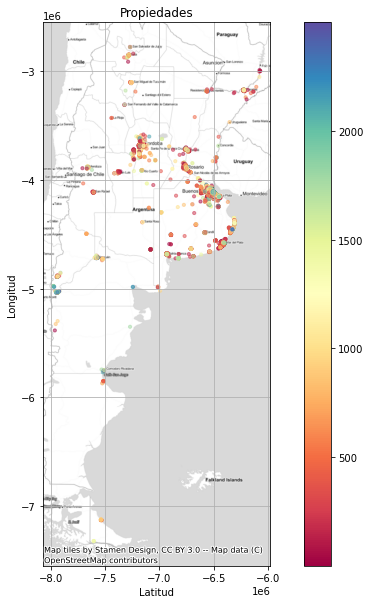

In [58]:
#GEOLOCALIZACIÓN SEGÚN VALOR x M2

fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Propiedades')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
plt.grid()

dptos.crs = "EPSG:4326"                        
geo_mask_3857 = dptos.to_crs(epsg=3857)       
geo_mask_3857.plot(column= 'precios_sin_outliers', cmap='Spectral', ax=ax,legend = True,alpha=0.5, markersize=10)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

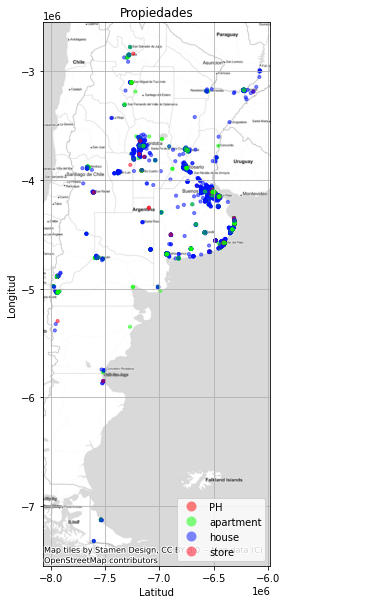

In [59]:
#GEOLOCALIZACIÓN SEGÚN TIPO DE PROPIEDAD

fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Propiedades')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
plt.grid()

dptos.crs = "EPSG:4326"                        
geo_mask_3857 = dptos.to_crs(epsg=3857)       
geo_mask_3857.plot(column= 'property_type', cmap='hsv', ax=ax,legend = True,alpha=0.5, markersize=10)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

### Filtro por geodatos y valor x M2

In [60]:
# Filtro propiedades dentro de CABA y con geolocalización.
mask_caba=data_3_nodup['state_name']=='Capital Federal'
mask_caba2=data_3_nodup['precios_sin_outliers']<5000
masklon=data_3_nodup['lon']>-59.5447221
mask3=data_3_nodup[mask_caba&mask_caba2&masklon]

In [61]:
geodptos = gpd.points_from_xy(mask3.lon, mask3.lat)
dptos_caba = gpd.GeoDataFrame(mask3, geometry=geodptos)

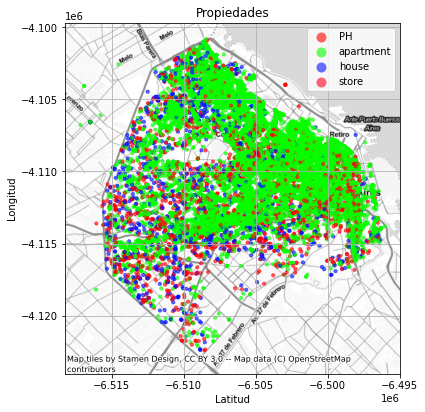

In [62]:
#GEOLOCALIZACIÓN POR TIPO DE PROPIEDAD EN CABA
fig, ax = plt.subplots(figsize=(6,8))
ax.set_title('Propiedades')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
plt.grid()

dptos_caba.crs = "EPSG:4326"                        
dptos_caba_3857 = dptos_caba.to_crs(epsg=3857)       
dptos_caba_3857.plot(column= 'property_type', cmap='hsv', ax=ax,legend = True,alpha=0.6, markersize=10)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

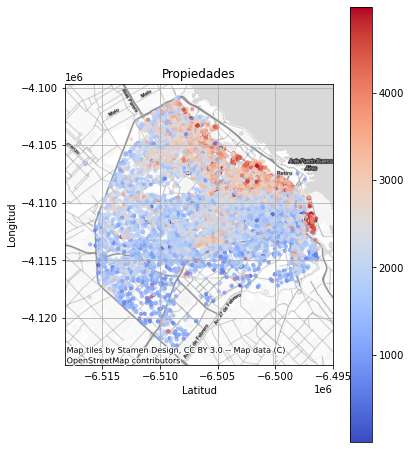

In [63]:
fig, ax = plt.subplots(figsize=(6,8))
ax.set_title('Propiedades')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')

plt.grid()
dptos_caba.crs = "EPSG:4326"                        
dptos_caba_3857 = dptos_caba.to_crs(epsg=3857)       
dptos_caba_3857.plot(column= 'precios_sin_outliers', cmap='coolwarm', ax=ax,legend = True,alpha=0.6, markersize=10)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

<p style="color:#FF0000";> Muy bueno las visualizaciones georeferenciales !  Faltaría aclarar qué indican los colores, es decir, la legenda

## Otras visualizaciones

In [64]:
tipo_prop=data_3_nodup['property_type'].value_counts()
tipo_prop

apartment    60769
house        38121
PH            5539
store         3916
Name: property_type, dtype: int64

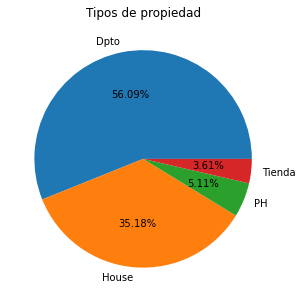

In [65]:
titulos=['Dpto','House','PH','Tienda']
fig = plt.figure(figsize=(10,5)); ax = plt.axes()
ax.set_title('Tipos de propiedad')
ax.pie(tipo_prop, labels = titulos ,autopct='%1.2f%%')
plt.show()

In [66]:
#Función para filtrar por tipo de prop
def prop(x):
    mask=data_3_nodup['property_type']==(x)
    mean=data_3_nodup['precios_sin_outliers'][mask]
    price=mean.mean().round(2)
    return price

In [67]:
pricecasa=prop('house')
pricedpto=prop('apartment')
priceph=prop('PH')
pricestore=prop('store')

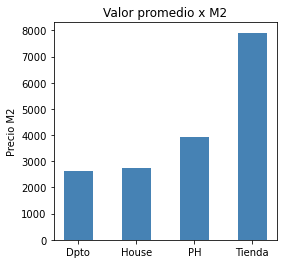

In [68]:
#PROMEDIO DE VALOR M2 X TIPO DE PROP
pricemeans=(priceph,pricecasa,pricedpto,pricestore)
width = 0.50 # ancho de las barras
fig = plt.figure(figsize=(4,4)); ax = plt.axes()
ax.bar(titulos, pricemeans, width, color='steelblue') # barra roja. 
ax.set_ylabel('Precio M2'); ax.set_title('Valor promedio x M2')
plt.show()

In [69]:
def provincias(x):
    mask=data_3_nodup['state_name']==(x)
    mean=data_3_nodup['precios_sin_outliers'][mask].mean().round(2)
    return mean

In [70]:
meancor=provincias('Córdoba')
meansantafe=provincias('Santa Fe')
meancaba=provincias('Capital Federal')
meannorte=provincias('Bs.As. G.B.A. Zona Norte')
meancosta=provincias('Buenos Aires Costa Atlántica')

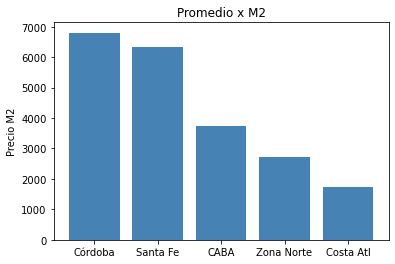

In [71]:
#Promedio valor M2 por top 5 provincias
provsmeans=(meancor,meansantafe,meancaba,meannorte,meancosta)
titulos2= ('Córdoba','Santa Fe', 'CABA','Zona Norte','Costa Atl')
width = 0.50 # ancho de las barras
fig = plt.figure(figsize=(6,4)); ax = plt.axes()
ax.bar(titulos2, provsmeans, color='steelblue') # barra roja. 
ax.set_ylabel('Precio M2'); ax.set_title('Promedio x M2')
plt.show()

<p style="color:#FF0000";> Qué loco! Hubiese dicho que CABA es el lugar más caro por metro cuadrado

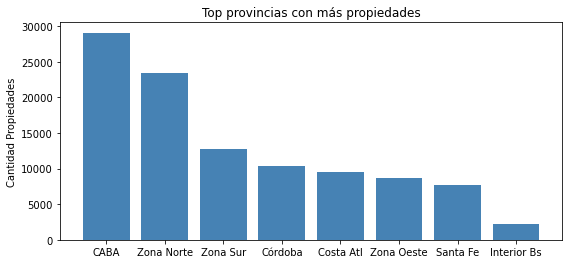

In [72]:
#Top ranking de provincias con más propiedades
ranking=data_3_nodup['state_name'].value_counts()
topranking=ranking.head(8)
titulos3=('CABA', 'Zona Norte','Zona Sur', 'Córdoba','Costa Atl',
          'Zona Oeste','Santa Fe','Interior Bs')
fig = plt.figure(figsize=(9,4)); ax = plt.axes()
ax.bar(titulos3, topranking, color='steelblue') # barra roja. 
ax.set_ylabel('Cantidad Propiedades'); ax.set_title('Top provincias con más propiedades')
plt.show()

In [73]:
ranking2=data_3_nodup['property_type'].value_counts()
topranking2=ranking2.head(8)
topranking2

apartment    60769
house        38121
PH            5539
store         3916
Name: property_type, dtype: int64

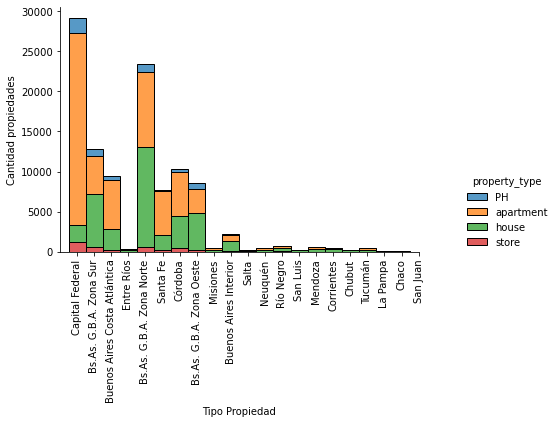

In [74]:
g = sns.displot(data=data_3_nodup, x="state_name", hue="property_type",multiple="stack")
g.fig.set_size_inches(8, 4)
g.set_axis_labels("Tipo Propiedad", "Cantidad propiedades")
plt.xticks(rotation=90)
plt.xlim((-1,20))

plt.show()

<p style="color:#FF0000";> Este gráfico si me gusto! Tiene menos categorías. Tal vez habría que setear un maor ancho del gráfico y poner la leyenda arriba. Otra cosa que mejoraría la información sería ordenar las zonas de mayor a menor segun la cntidad total de propiedadems

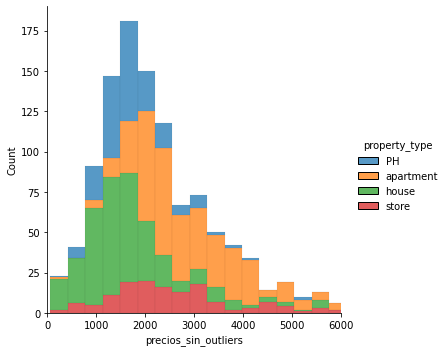

In [75]:
ag = sns.displot(data=data_pivot, x="precios_sin_outliers", hue="property_type", multiple="stack")
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Precio por M2", "Propiedades")
plt.xlim((0,6000))
plt.show()

<p style="color:#FF0000";> Respecto a este gráfico ya lo charlamos en clase. Sería oportuno hacer 4 dist plot separados o hacerlos todos juntos sin stackear y con transparencia, para poder establecer comparaciones

In [76]:
data_cf=data_3_nodup.loc[data.state_name == 'Capital Federal', :]
data_cf=data_cf.loc[data.property_type != 'store', :]
print(data_cf.shape)
data_cf.rename(columns={'place_name':'Barrio'}, inplace=True)

(27800, 26)


In [77]:
contar_CF = data_cf['Barrio'].value_counts()
contar_CF.head(5)

Belgrano         2641
Palermo          2531
Caballito        2022
Recoleta         1398
Villa Urquiza    1349
Name: Barrio, dtype: int64

In [78]:
# mask_contar = contar_CF>400
# data_cf1 = contar_CF[mask_contar]
# mask_barrio = (data_cf.Barrio == 'Belgrano')|(data_cf.Barrio == 'Palermo')|(data_cf.Barrio == 'Caballito')|(data_cf.Barrio == 'Villa Urquiza')|(data_cf.Barrio == 'Recoleta')|(data_cf.Barrio == 'Flores')|(data_cf.Barrio == 'Villa Crespo')|(data_cf.Barrio == 'San Telmo')|(data_cf.Barrio == 'Almagro')|(data_cf.Barrio == 'Barrio Norte')|(data_cf.Barrio == 'Boedo')|(data_cf.Barrio == 'Nuñez')|(data_cf.Barrio == 'Puerto Madero')|(data_cf.Barrio == 'Balvanera')|(data_cf.Barrio == 'San Cristobal')|(data_cf.Barrio == 'Saavedra')|(data_cf.Barrio == 'Palermo Hollywood')|(data_cf.Barrio == 'Floresta')|(data_cf.Barrio == 'Monserrat')|(data_cf.Barrio == 'Villa del Parque')|(data_cf.Barrio == 'Villa Luro')|(data_cf.Barrio == 'Barracas')|(data_cf.Barrio == 'Villa Devoto')

C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


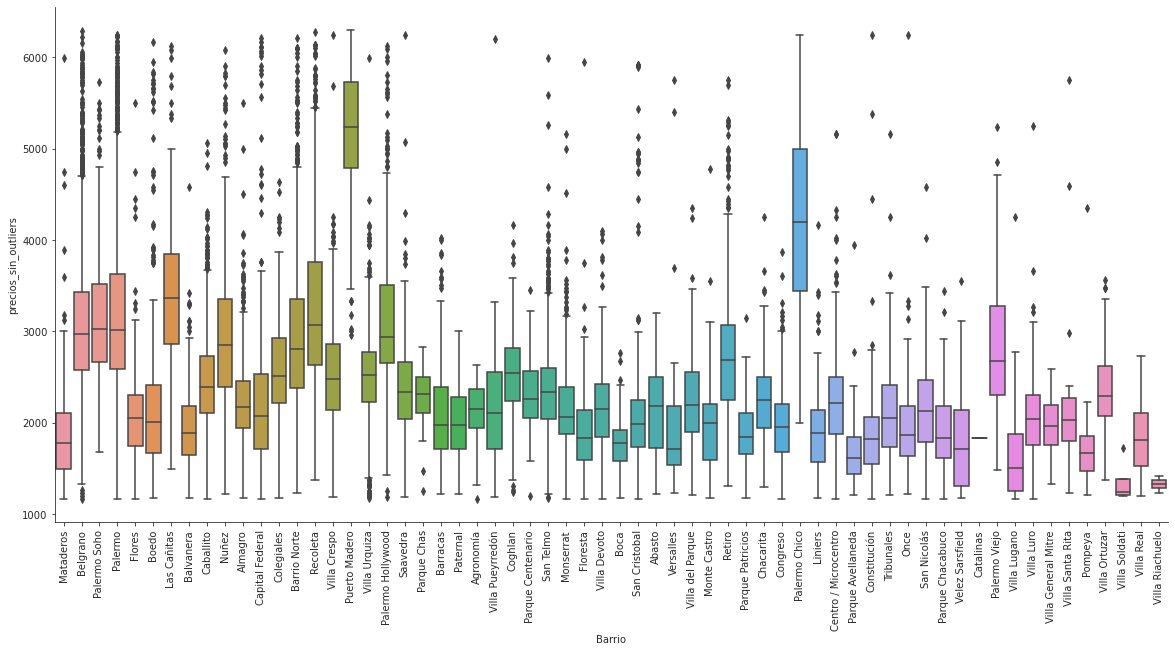

In [79]:
removed_outliers = data_cf['precios_sin_outliers'].between(data_cf['precios_sin_outliers'].quantile(.05), data_cf['precios_sin_outliers'].quantile(.95))
data_cf=data_cf[removed_outliers]
data_cf.shape 
with sns.axes_style(style='ticks'):
    g = sns.catplot("Barrio","precios_sin_outliers",data=data_cf, kind="box")
    g.fig.set_size_inches(20,8)
    g.set_axis_labels("Barrio", "precios_sin_outliers");
    plt.xticks(rotation=90)

In [80]:
(data_3_nodup.isnull().sum()/data_3_nodup.shape[0])*100

operation                   0.000000
property_type               0.000000
place_name                  0.000000
place_with_parent_names     0.000000
country_name                0.000000
state_name                  0.000000
geonames_id                15.985971
lat                        39.512668
lon                        39.512668
price                      13.600997
currency                   13.601920
price_aprox_usd            13.600997
surface_total_in_m2        32.573723
surface_covered_in_m2      15.452490
price_usd_per_m2           41.157414
price_per_m2               24.595505
floor                      93.177350
rooms                      59.058563
description                 0.001846
title                       0.000000
precios_sin_outliers       20.008307
pileta                      0.000000
cochera                     0.000000
ambientes                  70.474872
barrio_cerrado             99.059486
geometry                    0.000000
dtype: float64

In [81]:
# data_3_nodup.to_csv (r'C:\Users\agalli\Desktop\Anaconda\data_3_nodup.csv', index = False, header=True)

<p style="color:#FF0000";> Buen trabajo chicos, lograron atacar todos los objetivos propuestos por el desafio!
    
<p style="color:#FF0000";> Creo que lo más importante a atender es el tema de limpieza de outliers mediante la agrupación de otras categorias, como lo son los tipo de propiedad y la ubicación. Recuerden que gran parte del éxito del modelo depende de la preparación de los datos

<p style="color:#FF0000";> En términos de visualización, hubieron algunas que me gustaron bastante, sobre toda la apuesta con geopandas, y otras que no terminaban de ser herramientas útiles. Creo que hay que mejorar un poco en ese aspecto y buscar que los gráficos sirvan y sea claros, de lo contrario borrarlos. Lo que no suma termina restando.
    
<h1 style="color:#FF0000";> Felicitaciones por el trabajo, a seguir así!